In [104]:
import os
import os.path as op
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_1samp

## Decode from wavelets for heard tones

In [105]:
data = {}
root = Path('../data/bids/derivatives/decoding/')
for file in root.rglob("*"):
    if 'decode_from_wavelets_heard' not in file.name:
        continue
    print(file)
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    if len(value) != 1667:
        print(file)
        print(f'Wrong shape: {len(value)} instead of 751')
        continue
    data[key] = value

df_heard = pd.DataFrame.from_dict(data)
df_heard = df_heard.transpose()

n_subs_heard = len(df_heard)
print(f"n = {n_subs_heard}")

../data/bids/derivatives/decoding/sub-23/sub-23_task-imagine_run-1_desc-decode_from_wavelets_heard.npy
../data/bids/derivatives/decoding/sub-28/sub-28_task-imagine_run-1_desc-decode_from_wavelets_heard.npy
../data/bids/derivatives/decoding/sub-27/sub-27_task-imagine_run-1_desc-decode_from_wavelets_heard.npy
../data/bids/derivatives/decoding/sub-13/sub-13_task-imagine_run-1_desc-decode_from_wavelets_heard.npy
../data/bids/derivatives/decoding/sub-1/sub-1_task-imagine_run-1_desc-decode_from_wavelets_heard.npy
../data/bids/derivatives/decoding/sub-12/sub-12_task-imagine_run-1_desc-decode_from_wavelets_heard.npy
../data/bids/derivatives/decoding/sub-17/sub-17_task-imagine_run-1_desc-decode_from_wavelets_heard.npy
../data/bids/derivatives/decoding/sub-16/sub-16_task-imagine_run-1_desc-decode_from_wavelets_heard.npy
../data/bids/derivatives/decoding/sub-2/sub-2_task-imagine_run-1_desc-decode_from_wavelets_heard.npy
../data/bids/derivatives/decoding/sub-22/sub-22_task-imagine_run-1_desc-decod

In [113]:
# Reshape data for seaborn

# Rename columns for easy transformation
df_sns = df_heard.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()

# Add msec
indexes = np.array(range(1,1668))
indexes = (1000/1667)*indexes - 500
indexes = np.repeat(indexes, n_subs_heard)
df_sns['msec'] = indexes

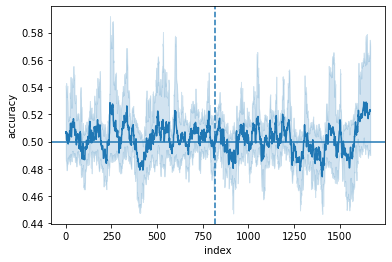

In [118]:
# Plot
plt = sns.lineplot(data = df_sns, x = "index", y = "accuracy")
plt.axhline(y = 0.5)
plt.axvline(x = 815, linestyle = 'dashed')

## Decode from wavelets for imagined tones

In [120]:
data = {}
root = Path('../data/bids/derivatives/decoding/')
for file in root.rglob("*"):
    if 'decode_from_wavelets_imagined' not in file.name:
        continue
    print(file)
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    if len(value) != 1667:
        print(file)
        print(f'Wrong shape: {len(value)} instead of 751')
        continue
    data[key] = value

df_imagined = pd.DataFrame.from_dict(data)
df_imagined = df_imagined.transpose()

n_subs_imagined = len(df_imagined)
print(f"n = {n_subs_imagined}")

../data/bids/derivatives/decoding/sub-23/sub-23_task-imagine_run-1_desc-decode_from_wavelets_imagined.npy
../data/bids/derivatives/decoding/sub-28/sub-28_task-imagine_run-1_desc-decode_from_wavelets_imagined.npy
../data/bids/derivatives/decoding/sub-27/sub-27_task-imagine_run-1_desc-decode_from_wavelets_imagined.npy
../data/bids/derivatives/decoding/sub-13/sub-13_task-imagine_run-1_desc-decode_from_wavelets_imagined.npy
../data/bids/derivatives/decoding/sub-1/sub-1_task-imagine_run-1_desc-decode_from_wavelets_imagined.npy
../data/bids/derivatives/decoding/sub-12/sub-12_task-imagine_run-1_desc-decode_from_wavelets_imagined.npy
../data/bids/derivatives/decoding/sub-17/sub-17_task-imagine_run-1_desc-decode_from_wavelets_imagined.npy
../data/bids/derivatives/decoding/sub-16/sub-16_task-imagine_run-1_desc-decode_from_wavelets_imagined.npy
../data/bids/derivatives/decoding/sub-2/sub-2_task-imagine_run-1_desc-decode_from_wavelets_imagined.npy
../data/bids/derivatives/decoding/sub-10/sub-10_ta

In [121]:
# Reshape data for seaborn

# Rename columns for easy transformation
df_sns = df_imagined.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()

# Add msec
indexes = np.array(range(1,1668))
indexes = (1000/1667)*indexes - 500
indexes = np.repeat(indexes, n_subs_imagined)
df_sns['msec'] = indexes

In [ ]:
# Plot
plt = sns.lineplot(data = df_sns, x = "index", y = "accuracy")
plt.axhline(y = 0.5)
plt.axvline(x = 815, linestyle = 'dashed')

### Tests

In [17]:
# T-tests
results = ttest_1samp(df, popmean = 0.20, axis = 0, alternative = 'greater')
t = results[0]
p = results[1]
x = list(range(1, len(p)+1))

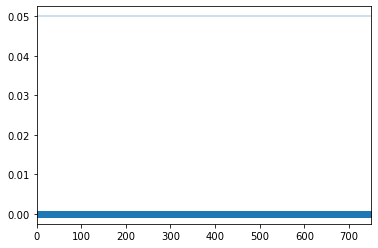

In [18]:
plt.scatter(x, p)
plt.plot([-1, 760],[0.05, 0.05], alpha = 0.3)
plt.xlim(0, 750)
plt.show()

## Decoder from stft

In [22]:
data = {}
root = Path('../data/bids/derivatives/decoding')
for file in root.rglob("*"):
    if 'decode_from_stft_heard' not in file.name:
        continue
    print(file)
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

../data/bids/derivatives/decoding/sub-23/sub-23_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/derivatives/decoding/sub-28/sub-28_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/derivatives/decoding/sub-27/sub-27_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/derivatives/decoding/sub-13/sub-13_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/derivatives/decoding/sub-1/sub-1_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/derivatives/decoding/sub-12/sub-12_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/derivatives/decoding/sub-17/sub-17_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/derivatives/decoding/sub-16/sub-16_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/derivatives/decoding/sub-2/sub-2_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/derivatives/decoding/sub-22/sub-22_task-imagine_run-1_desc-decode_from_stft_heard.npy
../data/bids/d

### Plot

<AxesSubplot:xlabel='index', ylabel='accuracy'>

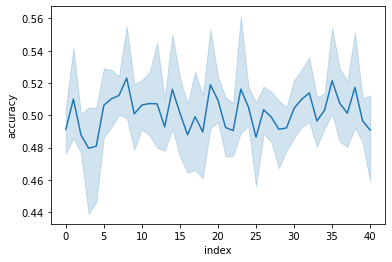

In [24]:
# Reshape data for seaborn

# Rename columns for easy transformation
df_sns = df.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()

# Plot
sns.lineplot(data = df_sns, x = "index", y="accuracy")

### Tests

In [39]:
# T-tests
results = ttest_1samp(df, popmean = 0.20, axis = 0, alternative = 'greater')
t = results[0]
p = results[1]
x = list(range(1, len(p)+1))

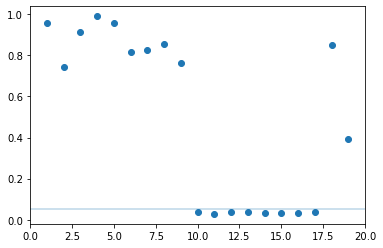

In [40]:
plt.scatter(x, p)
plt.plot([-1,20],[0.05,0.05], alpha = 0.3)
plt.xlim(0, 20)
plt.show()